In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# import the dataframe for advertising
dframe = pd.read_csv('Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])

In [3]:
# display the dataframe 
dframe.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Plot linear correlations between variables from the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

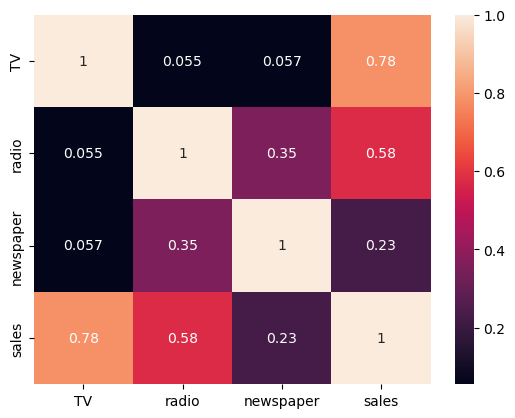

In [4]:
cor_mat = dframe.corr()
sns.heatmap(cor_mat, annot = True)
plt.show

Implement linear regression model

In [5]:
class LinearRegression():
    """
    Linear Regression Model using Least Squares method
    """
    
    def __init__(self):
        self.W = None
    
    def fit(self, train_data, train_labels):
        """
        Training function
        :param train_data: input training feature vectors
        :param train_features: imput training labels
        """
        # add the first 1 to each feature vector [1 x1] (lecture slide #16)
        
        X = np.vstack((np.ones(len(train_data)), train_data.T)).T
        Y = train_labels
        
        # acalculate the least square solution (lecture slide #17)
        self.W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
        
        return self
    
    def predict(self, test_data):
        """
        Prediction function
        :param test_dat: input features vectors for predictions
        :return: prediction
        """
        Y = []
        # add the first 1 to each feature vector [1 x]
        X = np.vstack((np.ones(len(test_data)), test_data.T)).T
        for x in X:
            y = np.dot(x, self.W)
            Y.append(y)
        return Y
    
    @property
    def get_weights(self):
        return self.W
        
        

In [6]:
# Implement evaluation metrics
    
def rmse(Y, Y_hat):
    """
    Calculate root mean squared error (RMSE) (lecture slide #19)
    :param Y: true labels
    :param Y_hat: predicted labels
    :return: rmse
    """
    return np.sqrt(np.square(np.sum(np.square(Y-Y_hat) / len(Y))))

In [7]:
def r2_score(Y, Y_hat):
    """
    Calculate R2 statistic metric (lecture slide #20)
    :param Y: true labels
    :param Y_hat: predicted labels
    :return: R2
    """
    RSS = np.sum(np.sum(np.square(Y - Y_hat)))
    Y_bar = np.mean(Y)
    TSS = np.sum(np.square(Y - Y_hat))
    R2 = 1 - RSS / TSS
    return R2

Random split dataset into training dataset (80%) and testing dataset (20%). 

In [8]:
train_df = dframe.sample(frac=0.80, random_state=2021)
test_df = dframe.drop(train_df.index)

X_train = train_df[['TV', 'radio', 'newspaper']].values
Y_train = train_df['sales'].values

X_test = test_df[['TV', 'radio', 'newspaper']].values
Y_test = test_df['sales'].values

Train linear regression model with the training data

In [9]:
trained_lr_model = LinearRegression().fit(X_train, Y_train)
print(trained_lr_model.get_weights)

[3.05453992e+00 4.51282015e-02 1.85389693e-01 9.08288652e-04]


Evaluate training performance of the trained model with the seen training dataset

In [10]:
# predictions of train data
predicted_Y_train = trained_lr_model.predict(X_train)

# calculate rmse metric
rmse_train = rmse(Y_train, predicted_Y_train)
print(rmse_train)

# calculate r2 metric
r2_train = r2_score(Y_train, predicted_Y_train)
print(r2_train)

2.8003934116879208
0.0


Evaluate testing performance of the trained model with the unseen testing
dataset

In [11]:
# predictions of test data
predicted_Y_test = trained_lr_model.predict(X_test)

# calculate rmse metric
rmse_test = rmse(Y_test, predicted_Y_test)
print(rmse_test)

# calculate r2 metric
r2_test = r2_score(Y_test, predicted_Y_test)
print(r2_test)

2.7471410870553785
0.0
